 # Olympics Project

[Data in Kaggle](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv)

### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Read the data

In [2]:
df = pd.read_csv('athlete_events.csv')

In [3]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Don't forget to drop duplicates first

In [4]:
df = df.drop_duplicates()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269731 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      269731 non-null  int64  
 1   Name    269731 non-null  object 
 2   Sex     269731 non-null  object 
 3   Age     260416 non-null  float64
 4   Height  210917 non-null  float64
 5   Weight  208204 non-null  float64
 6   Team    269731 non-null  object 
 7   NOC     269731 non-null  object 
 8   Games   269731 non-null  object 
 9   Year    269731 non-null  int64  
 10  Season  269731 non-null  object 
 11  City    269731 non-null  object 
 12  Sport   269731 non-null  object 
 13  Event   269731 non-null  object 
 14  Medal   39772 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 32.9+ MB


### Find the missing data in each column

In [6]:
df.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,9315
Height,58814
Weight,61527
Team,0
NOC,0
Games,0
Year,0


### Number of males and females

In [7]:
df['Sex'].value_counts()

,count
Sex,
M,195353
F,74378


### How many cities do we have and what are they ?

In [8]:
df['City'].nunique()

42

In [9]:
sorted(df['City'].unique())

['Albertville',
 'Amsterdam',
 'Antwerpen',
 'Athina',
 'Atlanta',
 'Barcelona',
 'Beijing',
 'Berlin',
 'Calgary',
 'Chamonix',
 "Cortina d'Ampezzo",
 'Garmisch-Partenkirchen',
 'Grenoble',
 'Helsinki',
 'Innsbruck',
 'Lake Placid',
 'Lillehammer',
 'London',
 'Los Angeles',
 'Melbourne',
 'Mexico City',
 'Montreal',
 'Moskva',
 'Munich',
 'Nagano',
 'Oslo',
 'Paris',
 'Rio de Janeiro',
 'Roma',
 'Salt Lake City',
 'Sankt Moritz',
 'Sapporo',
 'Sarajevo',
 'Seoul',
 'Sochi',
 'Squaw Valley',
 'St. Louis',
 'Stockholm',
 'Sydney',
 'Tokyo',
 'Torino',
 'Vancouver']

### Find the number of athlete for each year

In [10]:
df.groupby('Year')['ID'].nunique()

,ID
Year,
1896,176
1900,1224
1904,650
1906,841
1908,2024
1912,2409
1920,2676
1924,3565
1928,3703


### Which athlete participated the most? (his/her name and ID)

In [11]:
df['ID'].value_counts().head(1)

,count
ID,
106296,39


In [12]:
topAthleteId = df['ID'].value_counts().idxmax()
numParticipations = df['ID'].value_counts().max()
athleteName = df[df['ID'] == topAthleteId]['Name'].iloc[0]

print(f"The athlete who participated the most is {athleteName} (ID: {topAthleteId}) with {numParticipations} participations.")

The athlete who participated the most is Heikki Ilmari Savolainen (ID: 106296) with 39 participations.


### Find the number of each medal for each year.
##### The output should look like this
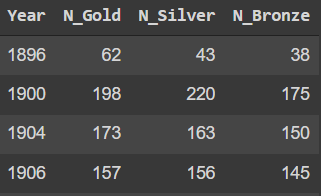

In [16]:
medalsPerYear = df[df['Medal'].notnull()].groupby(['Year', 'Medal'])['ID'].count().unstack().fillna(0)

medalsPerYear = medalsPerYear.rename(columns={
    'Gold': 'N_Gold',
    'Silver': 'N_Silver',
    'Bronze': 'N_Bronze'
})


medalsPerYear = medalsPerYear[['N_Gold', 'N_Silver', 'N_Bronze']]
medalsPerYear.head(4)

Medal,N_Gold,N_Silver,N_Bronze
Year,,,
1896,62,43,38
1900,198,220,175
1904,173,163,150
1906,157,156,145


### Provide all your answers with plots

### Find the number of winners with the gold medal in each city?

In [17]:
goldPerCity = df[df['Medal'] == 'Gold'].groupby('City')['ID'].count().sort_values(ascending=False)

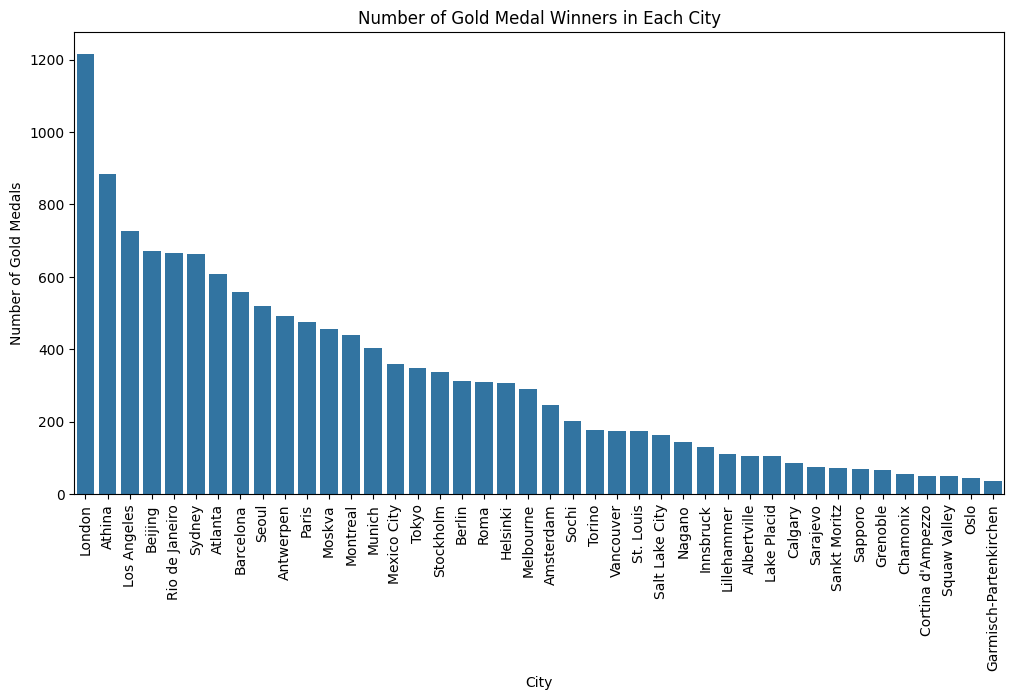

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(x=goldPerCity.index, y=goldPerCity.values)
plt.xticks(rotation=90)
plt.title('Number of Gold Medal Winners in Each City')
plt.xlabel('City')
plt.ylabel('Number of Gold Medals')
plt.show()

### Find the total missing data for each year?

In [19]:
missingPerYear = df.groupby('Year').apply(lambda x: x.isnull().sum().sum())


<ipython-input-19-3967084223>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missingPerYear = df.groupby('Year').apply(lambda x: x.isnull().sum().sum())


In [20]:
missingPerYear

,0
Year,
1896,1065
1900,5676
1904,3331
1906,5022
1908,8057
1912,10018
1920,11175
1924,15194
1928,14124


### Dont use for loops, and provide all your answers with plots.

### Has the number of athletes changed over time for Summer and Winter?

In [21]:
athletesOverTime = df.groupby(['Year', 'Season'])['ID'].nunique().reset_index()

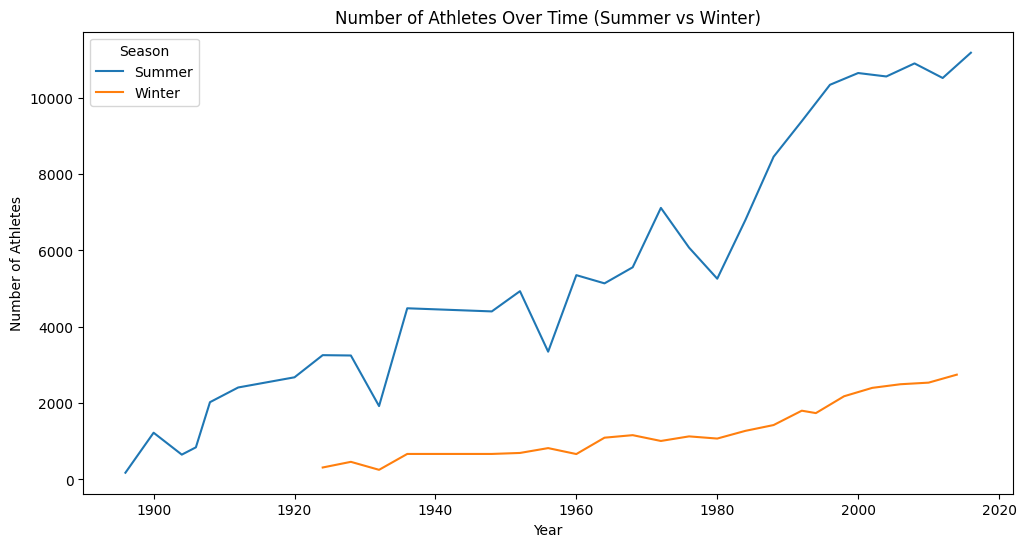

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=athletesOverTime, x='Year', y='ID', hue='Season')
plt.title('Number of Athletes Over Time (Summer vs Winter)')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.show()

### Regards,
### Esmail Jawabreh.